In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df_full = pd.read_csv('data2.csv', index_col=0)
feature_cols = [c for c in df_full.columns if 'genre_' not in c]
label_cols = [c for c in df_full.columns if 'genre_' in c]
df_full['genre_other'] = (df_full[label_cols].sum(axis=1) < 1).astype(int)
genres = [c.replace('genre_', '') for c in label_cols]
print('genres: ', genres)

genres:  ['black', 'death', 'doom', 'folk', 'heavy', 'melodic', 'power', 'progressive', 'rock', 'technical', 'thrash']


In [3]:
feature_cols_2 = list(np.array(feature_cols)[(df_full[feature_cols].sum(axis=0) > 100)])

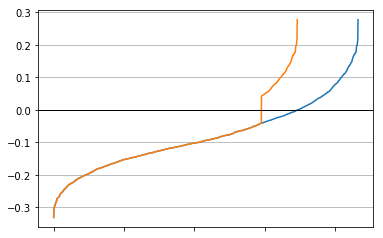

In [4]:
genre = 'black'
genre_col = 'genre_' + genre
corr = df_full[feature_cols_2].apply(lambda x: x.corr(df_full[genre_col]))
corr.sort_values().plot()
corr = corr[corr.abs().argsort()][len(corr) // 5:].sort_values()
corr.plot()
plt.axhline(y=0, color='k', lw=1)
plt.grid(axis='y')
plt.show()

In [5]:
vocabulary = set()
for genre in genres:
    genre_col = 'genre_' + genre
    corr = df_full[feature_cols].apply(lambda x: x.corr(df_full[genre_col]))
    corr = corr[corr.abs().argsort()][len(corr) // 5:].sort_values()
    vocabulary.update(set(corr.index))

In [8]:
len(vocabulary), len(feature_cols)

(25198, 29258)

In [5]:
genre = 'black'

In [6]:
# Feature reduction
# feature_cols = list(np.array(feature_cols)[(df_full[feature_cols] < 10).any(axis=0)])
feature_cols = list(np.array(feature_cols)[(df_full[feature_cols].sum(axis=0) > 100)])

genre_col = 'genre_' + genre
df = df_full[feature_cols + [genre_col]]
df_features = df[feature_cols].copy()
df = pd.concat((df_features.div(df_features.sum(axis=1), axis=0), df[genre_col]), axis=1)
# df.head()
df.shape

(386, 2165)

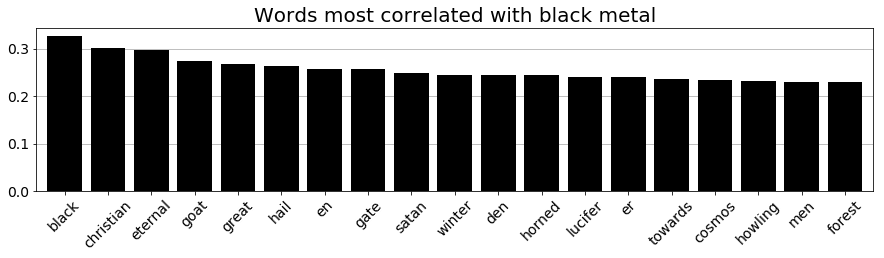

In [7]:
corr = df.corr()
# corr_cols = corr.columns[corr[genre_col].abs() > 0.1]
# corr_cols = corr[genre_col].abs().sort_values(ascending=False).index[:100]
corr_cols = corr[genre_col].sort_values(ascending=False).index[:20]
corr = corr.loc[corr_cols, corr_cols]
corr_sort = corr[genre_col].argsort()
corr = corr.iloc[corr_sort, corr_sort]

plt.figure(figsize=(15, 3))
corr[genre_col][-2::-1].plot(kind='bar', color='k', width=0.8)
plt.title('Words most correlated with {} metal'.format(genre), size=20)
plt.tick_params(labelsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.gca().set_axisbelow(True)
plt.show()